<a href="https://colab.research.google.com/github/NurJim/Machine-Learning/blob/main/Code_inmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SET:  Inmobiliaria**


## **Datos**

Los datos que aquí se van a tratar pueden encontrarse en:
https://www.kaggle.com/datasets/shivachandel/kc-house-data/code

La interpretación de las varibales puede ser encontrada en:
https://keepcoding.io/blog/metodos-de-filtrado-en-machine-learning/


## **Librerías**

Para llevar a cabo el análisis de los datos, necesitaremos las siguientes librerias:


In [71]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as iter
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import mstats
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Exploración de datos**

Comenzamos importando los datos en forma de DataFrame.

In [72]:
data = pd.read_csv("Data_inmobiliaria.csv")

Y vemos la dimensión que tienen.


In [73]:
data.shape

(21613, 21)

En este caso, tenemos un total de 21613 observaciones evaluadas en 21 variables.

Para hacernos una idea de los datos, vemos la cabecera de los mismo.

In [74]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Observamos:


*   La variable ***id*** representa un código de identificación de las observaciones, por lo que podría ser trasformado a un índice. 
* La variable ***zipcode*** representa un código de localización, al igual que la combinación de ***lat*** y ***long*** . Debido a que las segundas son más precisas, eliminaremos la variable ***zipcode*** más adelante.
*   La variable ***date*** tiene formato de fecha.
*   Es bastante probable que existan variables que estén contenidas unas en otras. Por ejemplo, ***sqft_living*** podría estar contenida en ***sqft_lot***. Debido a esto, haremos un análisis de correlaciones más adelante.
*   Las variables parecen ser numéricas continuas y numéricas discretas.





## **Análisis de observaciones**


Antes de comenzar con el análisis de variables en sí, debemos hacer unas comprobaciones previas sobre las observaciones.

**Datos faltantes**

Comenzamos viendo si existen valores nulos, pues en caso de hacerlo deberíamos plantearnos su  imputación. Esta comprobación se hará de una forma general, a través de `.info()`, y de una forma especifíca, a través de `.isnull().sum.`.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

En principio, parece que no hay datos missing. Además, observamos que todas las variables son de tipo numérico, a excepción de ***date***.


In [76]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Efectivamente, no existen valores nulos en la base de datos.

**Duplicados**

Comprobamos si existen observaciones duplicadas.




In [77]:
data[data.duplicated()].sum()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## **Análisis de variables**

**Limipeza del data set**

Una vez hechas las comprobaciones sobre las observaciones de la base de datos, comenzamos con el análisis de las variable.

Tal y como se ha mencionado con anterioridad, traformamos la variable ***id*** en un índice y eliminamos la variables ***zipcode*** . Además, eliminamos la vaiable ***date*** ya que no nos aporta nada al análisis.

In [78]:
# Eliminacion de variable zipcode
dat = data.drop(['zipcode','date'],axis=1)

# Cambio de indice
dat.set_index(keys='id',inplace=True)

Comprobamos que los cambios se han realizado de forma satisfactoria mostrando la cabecera del DataFrame.


In [79]:
dat.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062


**Estadísticos relevantes**

Comenzamos el análisis con un computo general de los estadíticos más destacados.

In [80]:
dat.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


A la vista de la tabla, destaca:
*  Existen casa sin habitaciones y/o sin baños, ya que las variables ***bedrooms*** y ***bathrooms*** alcanzan su mínimo en cero.
* Más del 75% de las casas no tienen acceso directo a un lago.
* Más del 75% de las casa tienen unas vistas puntuadas a cero. 
* La mayoría de las casas tienen tanto una condición como una puntuación media-alta.
* Más de la mitad de las casas no tienen sótano.
* Más del 75% de las casas son anteriores al año 2000 y no han sido renovadas recientemente.
* Teniendo en cuenta la longitud y la latitud, todas las casas se encuentran ubicadas en la misma zona.


**Detección de outliers**

Antes de seguir trabajando con las variables de interés, vamos a analizar si existen outliers, es decir, si existen observaciones que destaquen de las demás. Para ello, emplearemos el método de Tuckey, donde cualquier valor que esté a más de 3 veces la desviación estándar de la media se considera un valor atípico:

In [81]:
# Metodo de Tuckey
def out_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

# Analisis de la base de datos
for k in dat.columns.values:
  out_ind, out_val = out_tukey(dat[k])
  #print('variable:', k)
  #print('indice:', out_ind)
  #print('valores:', out_val)


**NOTA:** En este caso se obtienen muchos outliers por lo que se deja comentada la parte del código que los muestra por pantalla. 

Realizamos unos gráficos de cajas para ver con más claridad lo obtenido anteriormente. 

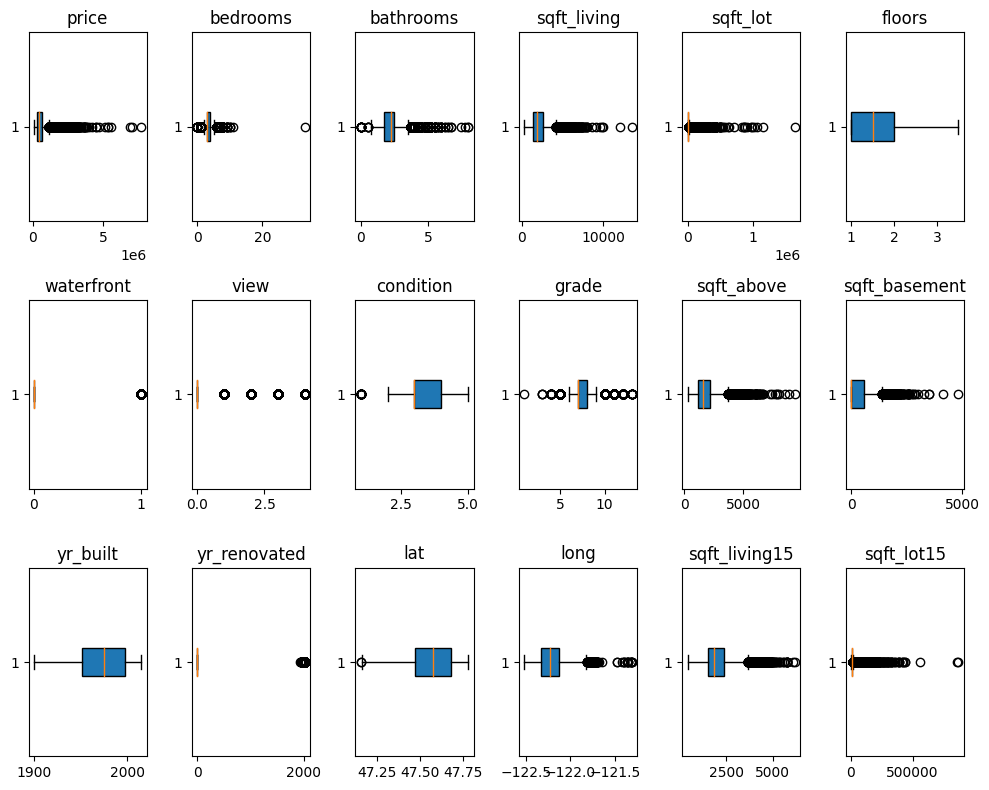

In [82]:
# Numero de filas y columnas necesarios para dibujar todos los boxplots
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Boxplot de cada variable
for i, columna in enumerate(dat.columns.values):
    ax = axs[i // n_cols][i % n_cols]
    ax.boxplot(dat[columna],vert=False,patch_artist=True) # boxplot de la variable
    ax.set_title(columna)

# Ajustar los espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

Tanto de forma analítica como de forma gráfica se detectan muchos posibles outlier. Sin embargo, estos solo relfejan las desigualdades que existen entre las casas evaluadas. Tal y como se ha mencionado en el apartado de **Estadísticos relevantes** existen pocas casas con vistas a un lago, por lo que cumplir esta condición podría ser representado como un outlier. Esto mismo ocurre con muchas variables que reprentan cuestiones que pocas casas suelen cumplir.

Vamos a intentar refinar la búsqueda de observaciones outliers. Para ello, vamos a definir una observación outlier como  aquella que se considera anómala en más de un tercio de las variables evaluadas. 

In [83]:
# Almacenamiento de outliers
ind_total = []
val_total = []
for k in range(dat.shape[1]):
  ind, val = out_tukey(dat.iloc[:, k])
  ind_total.append(ind) 
  val_total.append(val) 

# Unificacion en una sola lista
ind_total = list(iter.chain(*ind_total))
val_total = list(iter.chain(*val_total))

# Comprobacion de repeticion
lim = dat.shape[1]/2
k = 0
out_gen = []
for i in data.id:
  count = ind_total.count(i)
  if count > lim:
    out_gen.append(i)

# Outliers globales
print(np.unique(out_gen))

[ 853200010 1225069038 1247600105 2303900035 2424049029 2524049166
 3225079035 3528000040 4139420590 4139480200 4217402115 6762700020
 7558700030 7852011070 8106100085 8106100105 8835770170 9208900037
 9808700762]


Eliminamos las observaciones consideradas como outliers globales.

In [84]:
dat.drop(out_gen, axis=0, inplace=True)

**Estandarización de variables**

Para evitar que las dimensiones de las diferentes magnitudes en las que se mide cada variable sesgue el modelo de predicción, estadarizamos cada una de ellas.

In [85]:
# Estandarizacion
dt = pd.DataFrame()
for columna in dat.columns.values:
    x = (dat[columna] - dat[columna].mean()) / dat[columna].std()
    dt[columna] = x

# Cabecera de las variables estandarizadas
dt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,-0.896582,-0.397619,-1.455752,-0.992002,-0.227531,-0.915061,-0.085857,-0.30431,-0.629104,-0.558503,-0.738544,-0.660734,-0.544391,-0.209754,-0.352134,-0.305589,-0.944584,-0.260253
6414100192,0.001609,-0.397619,0.180826,0.548803,-0.188961,0.937368,-0.085857,-0.30431,-0.629104,-0.558503,0.469922,0.250998,-0.680563,4.754942,1.161421,-0.745912,-0.431511,-0.187063
5631500400,-1.015640,-1.474646,-1.455752,-1.446484,-0.122142,-0.915061,-0.085857,-0.30431,-0.629104,-1.414030,-1.239020,-0.660734,-1.293337,-0.209754,1.283342,-0.135142,1.078389,-0.171497
2487200875,0.189147,0.679409,1.162774,-0.127378,-0.243279,-0.915061,-0.085857,-0.30431,2.443970,-0.558503,-0.897232,1.413457,-0.203961,-0.209754,-0.282877,-1.271459,-0.915265,-0.284171
1954400510,-0.077952,-0.397619,-0.146489,-0.437756,-0.168658,-0.915061,-0.085857,-0.30431,-0.629104,0.297023,-0.128208,-0.660734,0.544984,-0.209754,0.409693,1.200031,-0.270260,-0.192067


**Normalidad**

Algunos modelos se basan en una hipótesis de normalidad, por lo que comprobamos si se da el caso. 

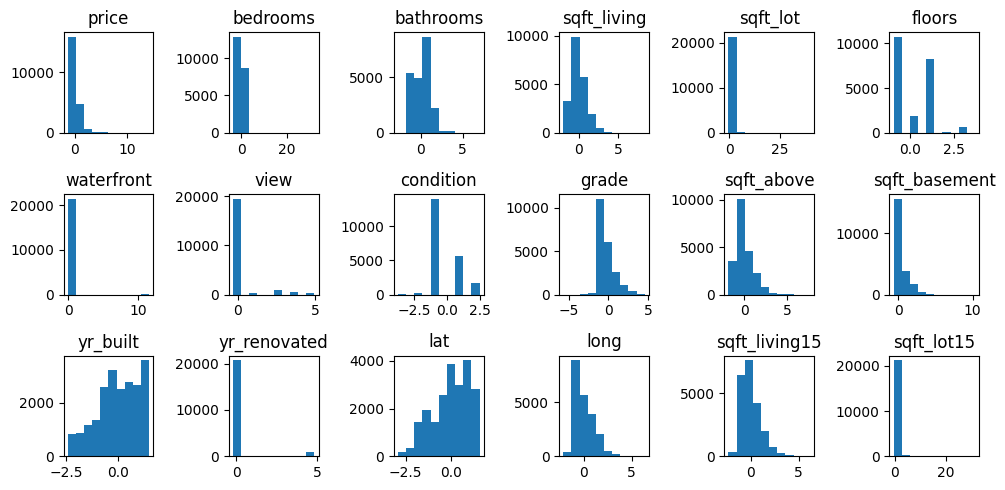

In [86]:
# Numero de filas y columnas necesarios para dibujar todos los subgraficos
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))

# Histograma de cada variable
for i, columna in enumerate(dt.columns.values):
    ax = axs[i // n_cols][i % n_cols]
    ax.hist(dt[columna]) # histograma de la variable
    ax.set_title(columna)

# Ajustar los espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

A pesar de que ninguna variable parece normal, realizamos un test de normalidad variable a variable. Para ello emplearemos la prueba de normalidad de Mardia que comprueba la normalidad de cada una de las variables de un DataFrame. Esta prueba utiliza una medida de asimetría y una medida de curtosis para calcular una estadística de prueba. Si la estadística de prueba es significativa, entonces hay evidencia de que los datos no siguen una distribución normal.



In [87]:
stat, pvalue = mstats.normaltest(dt)
print("p-valores:", pvalue)

p-valores: [0.00000000e+000 0.00000000e+000 1.80126437e-202 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


Como todos los p-valores son menores que 0.05 (significaión por defecto) se rechaza la hipótesis de que las variables son normales una a una.

**Correlaciones**

Hacemos una análisis de correlaciones para comprobar si existe alguna variable 
redundante en nuestro data set.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.306754,0.518227,0.695002,0.086469,0.261745,0.248602,0.388558,0.036710,0.673267,0.598656,0.311240,0.055842,0.122565,0.317281,0.022221,0.590326,0.078606
bedrooms,0.306754,1.000000,0.513388,0.576980,0.029104,0.174237,-0.011899,0.072651,0.028547,0.353649,0.475257,0.298977,0.153891,0.017431,-0.009499,0.128985,0.388733,0.025804
bathrooms,0.518227,0.513388,1.000000,0.750372,0.082059,0.502129,0.055547,0.175925,-0.126102,0.661220,0.680155,0.272911,0.509459,0.047622,0.023426,0.223641,0.564245,0.080341
sqft_living,0.695002,0.576980,0.750372,1.000000,0.166588,0.355531,0.092035,0.270880,-0.059709,0.761786,0.874427,0.423449,0.322422,0.050611,0.051329,0.242527,0.756576,0.176471
sqft_lot,0.086469,0.029104,0.082059,0.166588,1.000000,-0.007212,0.021206,0.071159,-0.008834,0.109462,0.178355,0.009508,0.052077,0.007507,-0.086665,0.228212,0.140585,0.716644
floors,0.261745,0.174237,0.502129,0.355531,-0.007212,1.000000,0.022097,0.027194,-0.264234,0.459172,0.525835,-0.250820,0.489779,0.005408,0.049321,0.125232,0.279591,-0.013528
waterfront,0.248602,-0.011899,0.055547,0.092035,0.021206,0.022097,1.000000,0.399645,0.015289,0.076179,0.061506,0.074398,-0.026374,0.092454,-0.015751,-0.042297,0.080678,0.030459
view,0.388558,0.072651,0.175925,0.270880,0.071159,0.027194,0.399645,1.000000,0.046561,0.241980,0.155096,0.267388,-0.055690,0.102687,0.005225,-0.080725,0.272339,0.067647
condition,0.036710,0.028547,-0.126102,-0.059709,-0.008834,-0.264234,0.015289,0.046561,1.000000,-0.145636,-0.160080,0.176138,-0.361354,-0.060543,-0.015043,-0.106312,-0.093260,-0.002838
grade,0.673267,0.353649,0.661220,0.761786,0.109462,0.459172,0.076179,0.241980,-0.145636,1.000000,0.754498,0.157564,0.448446,0.011833,0.113690,0.198229,0.710231,0.114770


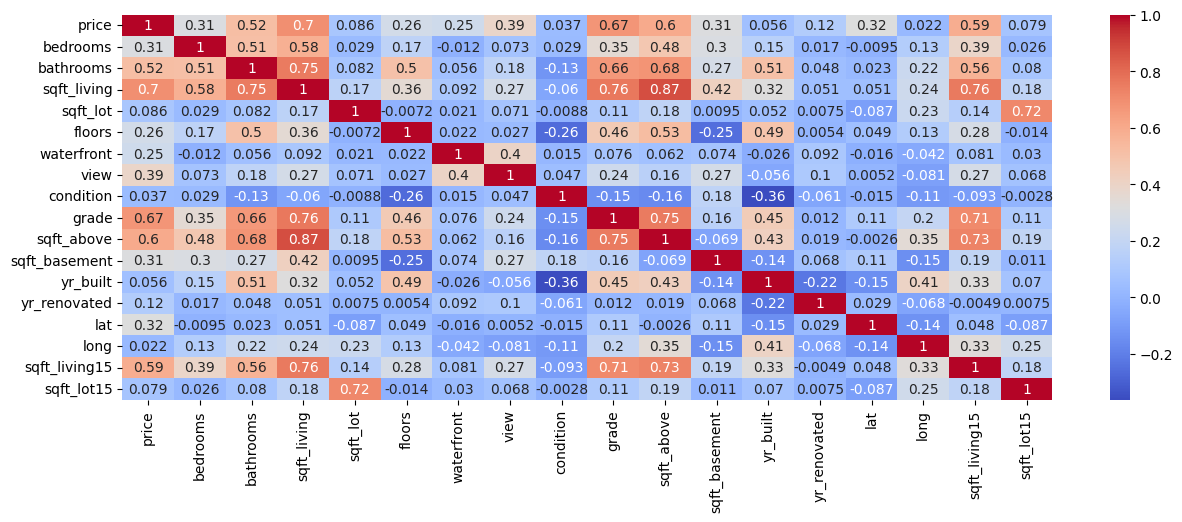

In [88]:
# Matriz de correlaciones
correlaciones = dt.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(15,5))
sns.heatmap(correlaciones,cmap="coolwarm",annot=True) 

# Matriz de correlaciones
correlaciones

Para una mejor interpretación de los datos creamos una función que extraiga los pares de variables que correlan más de 0.6 

In [89]:
# Indices  de las correlaciones mayores que 0.6
indices = np.where((np.abs(correlaciones) > 0.6))

# Eliminacion de duplicados y autocorrelaciones
pares = []
for i in range(len(indices[0])):
    if indices[0][i] != indices[1][i] and indices[0][i] < indices[1][i]: 
    # indices[0][i] != indices[1][i] -> evita la autocorrelacion 
    # indices[0][i] < indices[1][i] -> evita el duplicado tomando el par que tenga primero la variable pequeña
        par = (indices[0][i], indices[1][i]) # crea el par relacionado
        pares.append(par) 

# Renombramiento de las variables
columnas = dt.columns.values

correladas = []
for i in range(len(pares)):
  par = (columnas[pares[i][0]], columnas[pares[i][1]])
  correladas.append(par)

# Salida
print("Pares de variables correladas en más de un 60%:")
print(correladas)

Pares de variables correladas en más de un 60%:
[('price', 'sqft_living'), ('price', 'grade'), ('bathrooms', 'sqft_living'), ('bathrooms', 'grade'), ('bathrooms', 'sqft_above'), ('sqft_living', 'grade'), ('sqft_living', 'sqft_above'), ('sqft_living', 'sqft_living15'), ('sqft_lot', 'sqft_lot15'), ('grade', 'sqft_above'), ('grade', 'sqft_living15'), ('sqft_above', 'sqft_living15')]


De esta forma, se ve sencillamente que:
* Existe un grupo de variables altamente correladas. Este está formado por ***price***, ***bathrooms***, ***sqft_living***, ***grade***, ***sqft_above***. 
* Las vivienda que están situadas en una vecindad de 15, presentan unas dimensiones similares. Esto se ve reflejado en que las variables ***sqft_living*** y ***sqft_lot*** están altamente correladas con ***sqft_living15*** y ***sqft_lot15*** (respectivamente).


Eliminamos las variables redundantes:
* El grupo mencionado en el primer punto estará representado por la variable ***sqft_living***. Aunque mantendremos la variable ***price***, ya que este análisis tiene como finalidad la creación de un modelo predictivo para ésta variable.
* Se eliminarán las variables***sqft_living15*** y ***sqft_lot15*** al ser innecesarias.


<Axes: >

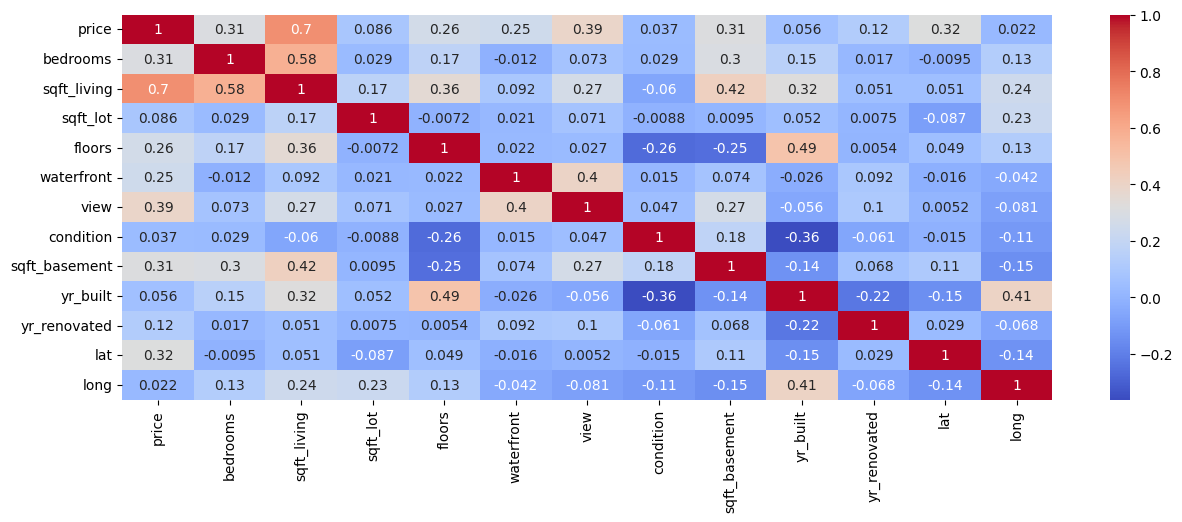

In [90]:
# Nueva base de datos
datos = dt.drop(['bathrooms','grade','sqft_above','sqft_living15','sqft_lot15'],axis=1)

# Matriz de correlaciones
correlaciones = datos.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(15,5))
sns.heatmap(correlaciones,cmap="coolwarm",annot=True) 

## **Gráficos comparativos**

Como este análisis servirá de base para un futuro modelo de predicción de precios, se presentaremos alguno gráficos que comparen el precio de las viviendas con algunas de las variables más influyentes.

Además, se plantearán otros gráficos de interés.

**Pair plot**

Comenzamos creando un plot enfrente todas las variables para ver cómo influyen unas en otras

In [91]:
sns.pairplot(datos)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0b90fad000> (for post_execute):


KeyboardInterrupt: ignored

**Precio vs superficie**

Una de las primeras cosas en las que nos fijamos cuando queremos ver el precio de una vivienda es en cuánto mide esta. Así pues, veamos cuánto infuye esto.


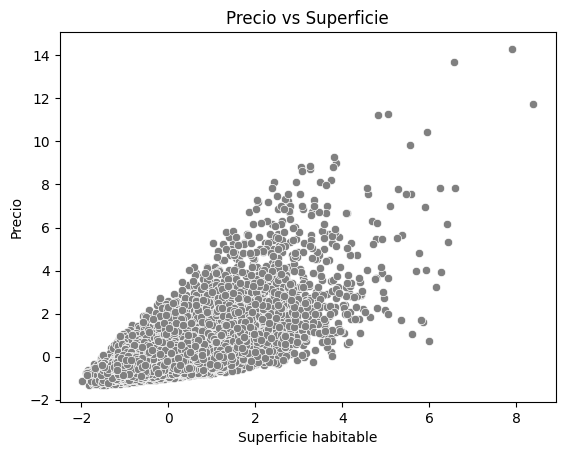

In [92]:
# Grafico
sns.scatterplot(x=datos.sqft_living, y=datos.price, color='grey')

# Personalizacion
plt.title('Precio vs Superficie', fontsize=12)
plt.xlabel('Superficie habitable', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.show()

Este gráfico presenta una clara forma de embudo, siguiendo la estructura de a mayor superficie mayor precio.

**Precio vs parcela**

Al igual que antes, podríamos pensar que el tamaño de la parcela influye fuertemente en el precio.

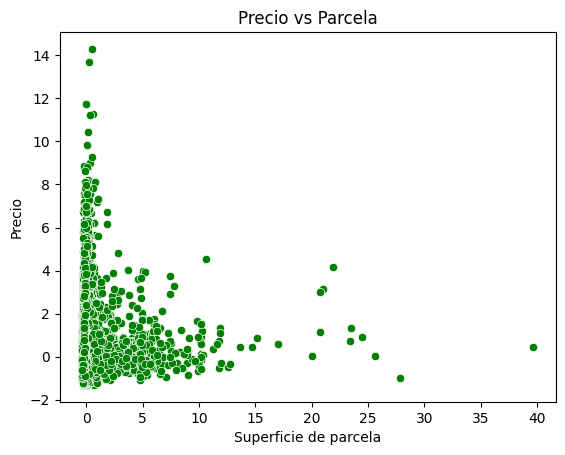

In [93]:
# Grafico
sns.scatterplot(x=datos.sqft_lot, y=datos.price, color='green')

# Personalizacion
plt.title('Precio vs Parcela', fontsize=12)
plt.xlabel('Superficie de parcela', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.show()

Sorprendentemente, el tamaño de la parcela no parece inlfuir de forma directa en el precio de la vivienda.

**Superficie habitable vs parcela**

A la vista de lo anterior y de la hipótesis planteada en **Eploración de datos**, planteamos esta coomparativa.

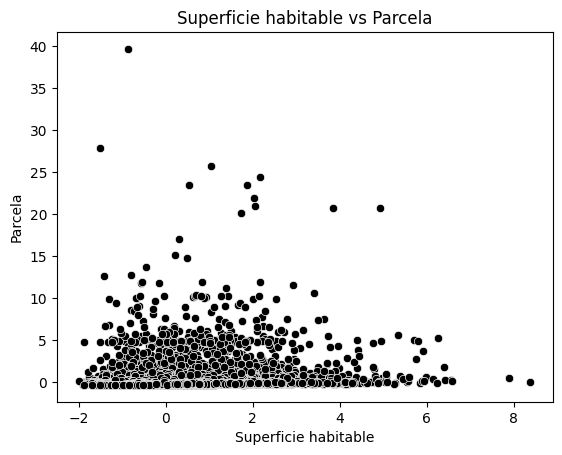

In [94]:
# Grafico
sns.scatterplot(x=datos.sqft_living, y=datos.sqft_lot, color='black')

# Personalizacion
plt.title('Superficie habitable vs Parcela', fontsize=12)
plt.xlabel('Superficie habitable', fontsize=10)
plt.ylabel('Parcela', fontsize=10)

plt.show()

En contra de lo planteado inicialmente, no existe una relación clara entre ambas variables

**Lago**

En el descriptivo, hemos visto que, en la mayoría de los casos, las viviendas no tenían salida a un lago. Incluso, las que sí lo hacían acababan apareciendo como outliers. Veamos qué proporción de ellas presentan esta cualidad.

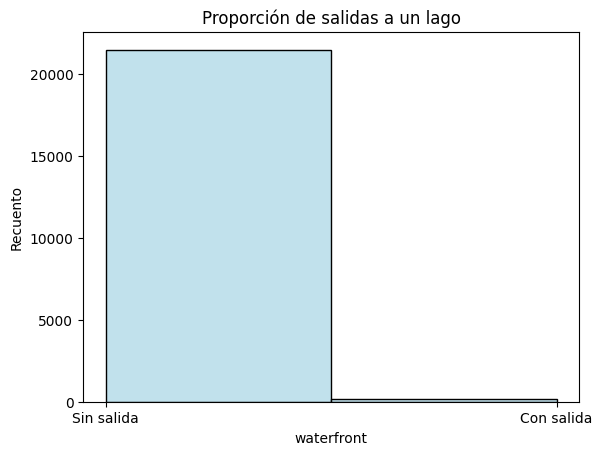

In [95]:
# Grafico
sns.histplot(data['waterfront'], bins=2, color='lightblue') 

# Personalizacion
plt.title('Proporción de salidas a un lago', fontsize=12)
plt.xticks(ticks=range(2),labels=['Sin salida','Con salida'])
plt.ylabel('Recuento', fontsize=10)

plt.show()

Como se puede ver, a penas existen casas con salida a un lago en nuestra base de datos. Por lo que debemos de plantearnos cómo de útil es esta variable.

**Número de plantas**

Veamos la altura que suelen presentar las casa del data set.

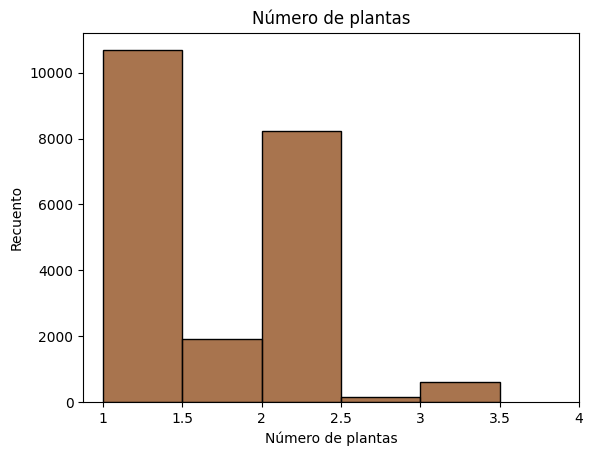

In [96]:
# Grafico
sns.histplot(data['floors'], bins=5, color='#8B4513') 

# Personalizacion
plt.title('Número de plantas', fontsize=12)
plt.xlabel('Número de plantas', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.xticks( [1,1.5,2,2.5,3,3.5,4], [1,1.5,2,2.5,3,3.5,4])

plt.show()

La base de datos tiene recogidas viviendas con medias plantas. Aún así, las viviendas que más abundan son la de 1 piso y las de 2.

## **Predicción**

**División del data set**


Comenzamos diviendo el data set en variables predictoras y variable a predecir.

In [111]:
# Variable a predecir
y = datos.price

# Variables predictoras
X = datos.drop(['price'],axis=1)

**Modelo de regresión lineal**

Como primer modelo de predicción, vamos a emplear la regresión lineal múltiple. 
$$
\hat{y} =  \beta_0 + \beta^\intercal X  = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

donde $\hat{y} \in \mathbb{R}$ es la variable a predecir y cada $x_i$ corresponde a una variable $p$ dimensional, $x_i \in \mathbb{R}^p$.


Una de las hipótesis más importantes de este modelo es que la varible 
 se disttribuye. Sin embargo, en el análisis de variables hemos comprobado que esto no secumple.

Probamos a hacer una trasformación logaritmica a la variable *price*

El p-valor es de: 0.0


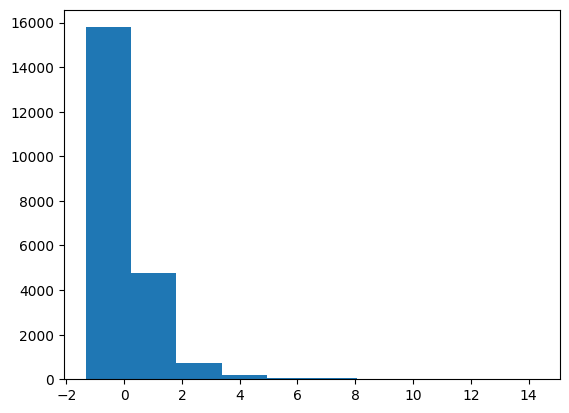

In [127]:
# Transformacion
yt = np.log(data.price)

# Adecuacion
yt = data[~data['id'].isin(out_gen)].price # eliminacion de outliers
yt = (yt - yt.mean()) / yt.std() # estandarizacion

# Histograma
plt.hist(yt)

# QQplot


# Contrate de Normalidad
import statistics
from scipy.stats import kstest
statistic, p_value = kstest(yt, 'norm', args=(statistics.mean(yt), statistics.stdev(yt)))
print('El p-valor es de:',p_value)

Una vez nuestros datos son aptos para el modelo, los dividimos en entrenamiento y validación. En estecaso, usaremos el 70% de los datos para crear el modelo y el 30% para validarlo.


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size=0.3, random_state=0) 

Ajustamos el modelo a nuestros datos.

In [130]:
# Ajuste del modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

Hacemos las predicciones que usaremos como prueba.

In [131]:
# Predeccion sobre los datos de train
y_pred_train = lin_reg.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = lin_reg.predict(X_test)

Calculamos diferentes medidas de validación.

In [132]:
# Medidas de precision 
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Validacion cruzada
scores = cross_val_score(lin_reg, X_train, y_train, cv=5).mean()

# Valores
print("CV: ", scores)
print("RMSE:", rmse) 
print("R2:", r2) 

CV:  0.6461500190786519
RMSE: 0.5721180699979056
R2: 0.6576671019072553


Como todos los parámetros de validación salen aceptables, damos por válido el modelo.